In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
# Download the dataset online
dataset_path = keras.utils.get_file("auto-mpg.data", "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")

# Use Pandas library to read the dataset
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight', 'Acceleration', 'Model Year', 'Origin']
raw_dataset = pd.read_csv(dataset_path, names=column_names, na_values = "?", comment='\t', sep=" ", skipinitialspace=True)

dataset = raw_dataset.copy()

# Show some data
dataset.head()

40960/30286 [========================================] - 0s 1us/step


,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [ ]:
dataset.isna().sum() # Calculate the number of missing values
dataset = dataset.dropna() # Drop missing value records
dataset.isna().sum() # Calculate the number of missing values again

MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [ ]:
# the origin field is categorical data, we first remove it and then convert it into three new fields, USA, Europe, and Japan
origin = dataset.pop('Origin')
dataset['USA'] = (origin == 1)*1.0
dataset['Europe'] = (origin == 2)*1.0
dataset['Japan'] = (origin == 3)*1.0
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
393,27.0,4,140.0,86.0,2790.0,15.6,82,1.0,0.0,0.0
394,44.0,4,97.0,52.0,2130.0,24.6,82,0.0,1.0,0.0
395,32.0,4,135.0,84.0,2295.0,11.6,82,1.0,0.0,0.0
396,28.0,4,120.0,79.0,2625.0,18.6,82,1.0,0.0,0.0
397,31.0,4,119.0,82.0,2720.0,19.4,82,1.0,0.0,0.0


In [ ]:
#Split the data into training (80%) and testing (20%) datasets:
train_dataset = dataset.sample(frac=0.8,random_state=0)
test_dataset = dataset.drop(train_dataset.index)

In [ ]:
#Move MPG out and use its real label:
train_labels = train_dataset.pop('MPG')
test_labels = test_dataset.pop('MPG')

In [ ]:
# Calculate the mean and standard deviation of each field value of the training set and complete the standardization of the data, through the norm() function
train_stats = train_dataset.describe()
#train_stats.pop("MPG")
train_stats = train_stats.transpose()

In [ ]:
train_stats

,count,mean,std,min,25%,50%,75%,max
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
USA,314.0,0.624204,0.485101,0.0,0.00,1.0,1.00,1.0
Europe,314.0,0.178344,0.383413,0.0,0.00,0.0,0.00,1.0
Japan,314.0,0.197452,0.398712,0.0,0.00,0.0,0.00,1.0


In [ ]:
# Normalize the data
def norm(x): # minus mean and divide by std
  return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

In [ ]:
normed_train_data

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
146,-0.869348,-1.009459,-0.784052,-1.025303,-0.379759,-0.516397,0.774676,-0.465148,-0.495225
282,-0.869348,-0.530218,-0.442811,-0.118796,0.624102,0.843910,0.774676,-0.465148,-0.495225
69,1.483887,1.482595,1.447140,1.736877,-0.738281,-1.060519,0.774676,-0.465148,-0.495225
378,-0.869348,-0.865687,-1.099044,-1.025303,-0.308055,1.660094,0.774676,-0.465148,-0.495225
331,-0.869348,-0.942365,-0.994047,-1.001603,0.875068,1.115971,-1.286751,-0.465148,2.012852
...,...,...,...,...,...,...,...,...,...
281,0.307270,0.044872,-0.521559,-0.000298,0.946772,0.843910,0.774676,-0.465148,-0.495225
229,1.483887,1.961837,1.972127,1.457223,-1.598734,0.299787,0.774676,-0.465148,-0.495225
150,-0.869348,-0.836932,-0.311564,-0.710099,-0.021237,-0.516397,-1.286751,-0.465148,2.012852
145,-0.869348,-1.076553,-1.151543,-1.169870,1.233589,-0.516397,-1.286751,-0.465148,2.012852


In [ ]:
train_labels

146    28.0
282    22.3
69     12.0
378    38.0
331    33.8
       ... 
281    19.8
229    16.0
150    26.0
145    32.0
182    28.0
Name: MPG, Length: 314, dtype: float64

In [ ]:
#Print the shape of training and testing datasets:
print(normed_train_data.shape,train_labels.shape)
print(normed_test_data.shape, test_labels.shape)

(314, 9) (314,)
(78, 9) (78,)


In [ ]:
# Create TensorFlow dataset:
train_db = tf.data.Dataset.from_tensor_slices((normed_train_data.values, train_labels.values))
train_db = train_db.shuffle(100).batch(32) # Shuffle and batch

In [ ]:
train_db # input features

<BatchDataset element_spec=(TensorSpec(shape=(None, 9), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>

In [ ]:
train_labels # targets

146    28.0
282    22.3
69     12.0
378    38.0
331    33.8
       ... 
281    19.8
229    16.0
150    26.0
145    32.0
182    28.0
Name: MPG, Length: 314, dtype: float64

In [ ]:
## Build the neural network and predict miles per gallon (mpg)
from keras.models import Sequential
from keras.layers import Activation, Dense

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(9,)))
model.add(Dense(64, activation='relu', input_shape=(64,)))
model.add(Dense(64, activation='relu', input_shape=(64,)))
model.add(Dense(32, activation='relu', input_shape=(64,)))
model.add(Dense(16, activation='relu', input_shape=(32,)))
model.add(Dense(1))

model.compile(optimizer= 'adam', #'rmsprop', #'sgd' 
                loss='mse', #'mean_squared_error' 
                metrics= ['mean_absolute_error']) #['accuracy'])

history = model.fit(normed_train_data, train_labels,
                    epochs=20,
                    batch_size=32)

Epoch 1/20
10/10 [==============================] - 3s 4ms/step - loss: 588.3196 - mean_absolute_error: 22.9606
Epoch 2/20
10/10 [==============================] - 0s 4ms/step - loss: 536.6802 - mean_absolute_error: 21.8149
Epoch 3/20
10/10 [==============================] - 0s 4ms/step - loss: 456.1616 - mean_absolute_error: 19.8201
Epoch 4/20
10/10 [==============================] - 0s 4ms/step - loss: 320.7516 - mean_absolute_error: 16.0328
Epoch 5/20
10/10 [==============================] - 0s 3ms/step - loss: 154.1727 - mean_absolute_error: 10.5922
Epoch 6/20
10/10 [==============================] - 0s 5ms/step - loss: 50.5112 - mean_absolute_error: 5.9453
Epoch 7/20
10/10 [==============================] - 0s 5ms/step - loss: 31.3522 - mean_absolute_error: 4.5245
Epoch 8/20
10/10 [==============================] - 0s 3ms/step - loss: 18.7289 - mean_absolute_error: 3.3400
Epoch 9/20
10/10 [==============================] - 0s 4ms/step - loss: 16.1053 - mean_absolute_error: 3.1273


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                640       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 9,025
Trainable params: 9,025
Non-trainable params: 0
_________________________________________________________________


In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mean_absolute_error,epoch
15,10.012403,2.349032,15
16,9.705239,2.313636,16
17,9.578795,2.286256,17
18,9.165411,2.227828,18
19,9.048627,2.223324,19


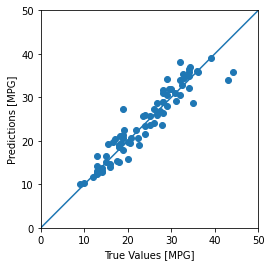

In [ ]:
# make predictions from test data
test_predictions = model.predict(normed_test_data).flatten()

# plot the predictions as well as true values
a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [ ]:
test_predictions

array([16.616573 , 10.357216 , 10.028127 , 23.552206 , 21.273277 ,
       12.973178 , 12.928537 , 12.375348 , 19.104471 , 28.72189  ,
       25.742188 , 27.428503 , 14.264237 , 26.30961  , 12.636452 ,
       13.746944 , 15.044396 , 13.066563 , 18.797781 , 11.720655 ,
       13.971146 , 25.920193 , 20.5386   , 21.474432 , 29.241922 ,
       24.002163 , 14.6940155, 23.411436 , 15.094426 , 19.67746  ,
       28.047592 , 18.60223  , 17.998728 , 22.536272 , 27.252226 ,
       15.383352 , 18.92995  , 34.254795 , 30.651144 , 15.891788 ,
       30.581001 , 28.992231 , 16.614937 , 33.98511  , 35.862244 ,
       35.34522  , 19.579205 , 20.6852   , 21.19533  , 26.875986 ,
       30.92516  , 20.46753  , 31.92006  , 19.75735  , 19.232128 ,
       19.432297 , 34.076153 , 34.91782  , 22.547005 , 23.571398 ,
       35.827145 , 32.870346 , 28.783266 , 25.792797 , 31.96947  ,
       38.944683 , 36.54702  , 36.945847 , 34.531136 , 28.977407 ,
       20.670935 , 26.018389 , 30.883776 , 32.099308 , 36.1393

In [ ]:
test_labels,

(9      15.0
 25     10.0
 28      9.0
 31     25.0
 33     19.0
        ... 
 369    34.0
 375    36.0
 382    34.0
 384    32.0
 396    28.0
 Name: MPG, Length: 78, dtype: float64,)